In [1]:
import jcopdl, luwiji
jcopdl.__version__,luwiji.__version__

('1.1.9', '1.1.8')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torchvision
from torch import nn, optim
from jcopdl.callback import Callback, set_config
device = torch.device("cuda:0" if torch.cuda.is_available() else"cpu")
device

device(type='cpu')

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:
bs = 128
crop_size = 64


train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(crop_size,scale=(0.8,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(70),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("data/train/", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data/test/", transform=test_transform)
testloader = DataLoader(test_set,batch_size=bs, shuffle=True)


In [6]:
label2cat = train_set.classes
label2cat

['invasive', 'noninvasive']

In [7]:
from jcopdl.layers import conv_block, linear_block

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            conv_block(3, 8), 
            conv_block(8, 16),
            conv_block(16, 32),
            conv_block(32, 64),
            nn.Flatten()
        )
        self.fc = nn.Sequential(
            linear_block(1024, 256, dropout=0.01), 
            linear_block(256, 3, activation="lsoftmax")
        )
    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

In [9]:
config = set_config({
    "batch_size":bs,
    "crop_size": crop_size
})

In [10]:
model = CNN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(),lr=0.001)
callback = Callback(model,config,outdir="model")

In [11]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target =feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output,target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1)  == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc



Epoch     1
Train_cost  = 0.9532 | Test_cost  = 0.7035 | Train_score = 0.5000 | Test_score = 0.5000 |




Epoch     2
Train_cost  = 0.6975 | Test_cost  = 0.6615 | Train_score = 0.5260 | Test_score = 0.5900 |




Epoch     3
Train_cost  = 0.6674 | Test_cost  = 0.6907 | Train_score = 0.5930 | Test_score = 0.5450 |
==> EarlyStop patience =  1 | Best test_score: 0.5900




Epoch     4
Train_cost  = 0.6454 | Test_cost  = 0.6455 | Train_score = 0.6260 | Test_score = 0.6700 |




Epoch     5
Train_cost  = 0.6395 | Test_cost  = 0.6393 | Train_score = 0.6250 | Test_score = 0.6550 |
==> EarlyStop patience =  1 | Best test_score: 0.6700




Epoch     6
Train_cost  = 0.6321 | Test_cost  = 0.6235 | Train_score = 0.6340 | Test_score = 0.6825 |




Epoch     7
Train_cost  = 0.6147 | Test_cost  = 0.6118 | Train_score = 0.6890 | Test_score = 0.6600 |
==> EarlyStop patience =  1 | Best test_score: 0.6825




Epoch     8
Train_cost  = 0.5906 | Test_cost  = 0.5961 | Train_score = 0.7070 | Test_score = 0.6825 |
==> EarlyStop patience =  2 | Best test_score: 0.6825




Epoch     9
Train_cost  = 0.5673 | Test_cost  = 0.5509 | Train_score = 0.6980 | Test_score = 0.7425 |




Epoch    10
Train_cost  = 0.5449 | Test_cost  = 0.5439 | Train_score = 0.7350 | Test_score = 0.7275 |
==> EarlyStop patience =  1 | Best test_score: 0.7425




Epoch    11
Train_cost  = 0.5217 | Test_cost  = 0.4625 | Train_score = 0.7470 | Test_score = 0.7825 |




Epoch    12
Train_cost  = 0.4643 | Test_cost  = 0.4274 | Train_score = 0.7980 | Test_score = 0.8225 |




Epoch    13
Train_cost  = 0.4389 | Test_cost  = 0.4592 | Train_score = 0.7950 | Test_score = 0.7875 |
==> EarlyStop patience =  1 | Best test_score: 0.8225




Epoch    14
Train_cost  = 0.4312 | Test_cost  = 0.3631 | Train_score = 0.7960 | Test_score = 0.8500 |




Epoch    15
Train_cost  = 0.3888 | Test_cost  = 0.3641 | Train_score = 0.8350 | Test_score = 0.8500 |
==> EarlyStop patience =  1 | Best test_score: 0.8500




Epoch    16
Train_cost  = 0.3891 | Test_cost  = 0.3476 | Train_score = 0.8290 | Test_score = 0.8400 |
==> EarlyStop patience =  2 | Best test_score: 0.8500




Epoch    17
Train_cost  = 0.3818 | Test_cost  = 0.3943 | Train_score = 0.8370 | Test_score = 0.8425 |
==> EarlyStop patience =  3 | Best test_score: 0.8500




Epoch    18
Train_cost  = 0.4114 | Test_cost  = 0.3857 | Train_score = 0.8130 | Test_score = 0.8525 |




Epoch    19
Train_cost  = 0.3819 | Test_cost  = 0.3543 | Train_score = 0.8310 | Test_score = 0.8450 |
==> EarlyStop patience =  1 | Best test_score: 0.8525




Epoch    20
Train_cost  = 0.3711 | Test_cost  = 0.3300 | Train_score = 0.8430 | Test_score = 0.8550 |


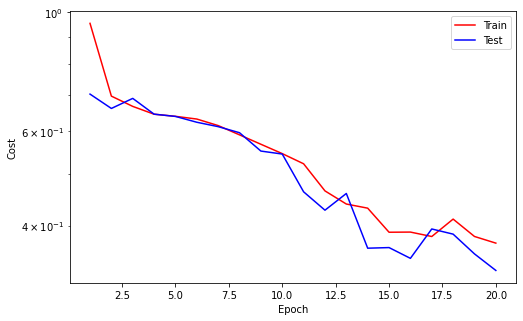

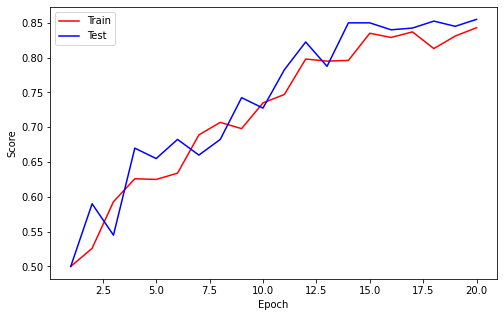



Epoch    21
Train_cost  = 0.3384 | Test_cost  = 0.3114 | Train_score = 0.8610 | Test_score = 0.8625 |




Epoch    22
Train_cost  = 0.3346 | Test_cost  = 0.3251 | Train_score = 0.8560 | Test_score = 0.8475 |
==> EarlyStop patience =  1 | Best test_score: 0.8625




Epoch    23
Train_cost  = 0.3326 | Test_cost  = 0.3546 | Train_score = 0.8570 | Test_score = 0.8400 |
==> EarlyStop patience =  2 | Best test_score: 0.8625




Epoch    24
Train_cost  = 0.3444 | Test_cost  = 0.4462 | Train_score = 0.8420 | Test_score = 0.7925 |
==> EarlyStop patience =  3 | Best test_score: 0.8625




Epoch    25
Train_cost  = 0.3574 | Test_cost  = 0.3208 | Train_score = 0.8400 | Test_score = 0.8550 |
==> EarlyStop patience =  4 | Best test_score: 0.8625




Epoch    26
Train_cost  = 0.3211 | Test_cost  = 0.3090 | Train_score = 0.8720 | Test_score = 0.8700 |




Epoch    27
Train_cost  = 0.3101 | Test_cost  = 0.2904 | Train_score = 0.8710 | Test_score = 0.8725 |




Epoch    28
Train_cost  = 0.3316 | Test_cost  = 0.3411 | Train_score = 0.8620 | Test_score = 0.8500 |
==> EarlyStop patience =  1 | Best test_score: 0.8725




Epoch    29
Train_cost  = 0.3348 | Test_cost  = 0.2953 | Train_score = 0.8620 | Test_score = 0.8725 |
==> EarlyStop patience =  2 | Best test_score: 0.8725




Epoch    30
Train_cost  = 0.3050 | Test_cost  = 0.2844 | Train_score = 0.8690 | Test_score = 0.8850 |




Epoch    31
Train_cost  = 0.2966 | Test_cost  = 0.2868 | Train_score = 0.8740 | Test_score = 0.8825 |
==> EarlyStop patience =  1 | Best test_score: 0.8850




Epoch    32
Train_cost  = 0.2869 | Test_cost  = 0.2790 | Train_score = 0.8790 | Test_score = 0.8875 |




Epoch    33
Train_cost  = 0.2803 | Test_cost  = 0.2740 | Train_score = 0.8830 | Test_score = 0.8850 |
==> EarlyStop patience =  1 | Best test_score: 0.8875




Epoch    34
Train_cost  = 0.2849 | Test_cost  = 0.3125 | Train_score = 0.8810 | Test_score = 0.8775 |
==> EarlyStop patience =  2 | Best test_score: 0.8875




Epoch    35
Train_cost  = 0.2858 | Test_cost  = 0.2784 | Train_score = 0.8750 | Test_score = 0.8800 |
==> EarlyStop patience =  3 | Best test_score: 0.8875




Epoch    36
Train_cost  = 0.2830 | Test_cost  = 0.2724 | Train_score = 0.8770 | Test_score = 0.8925 |




Epoch    37
Train_cost  = 0.2832 | Test_cost  = 0.2778 | Train_score = 0.8840 | Test_score = 0.8875 |
==> EarlyStop patience =  1 | Best test_score: 0.8925




Epoch    38
Train_cost  = 0.2691 | Test_cost  = 0.2722 | Train_score = 0.8970 | Test_score = 0.8975 |




Epoch    39
Train_cost  = 0.2861 | Test_cost  = 0.3349 | Train_score = 0.8860 | Test_score = 0.8475 |
==> EarlyStop patience =  1 | Best test_score: 0.8975




Epoch    40
Train_cost  = 0.2798 | Test_cost  = 0.2691 | Train_score = 0.8850 | Test_score = 0.8925 |


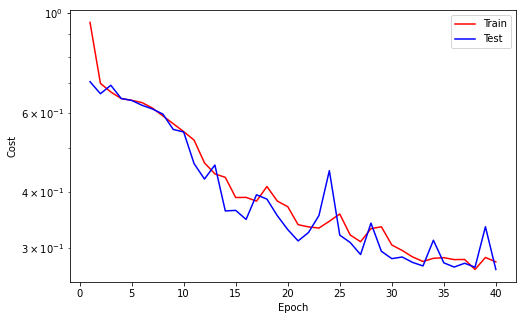

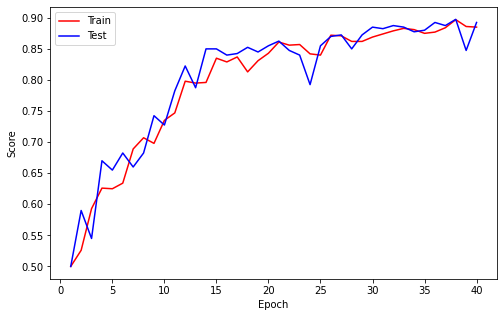

==> EarlyStop patience =  2 | Best test_score: 0.8975




Epoch    41
Train_cost  = 0.2425 | Test_cost  = 0.2578 | Train_score = 0.9020 | Test_score = 0.8925 |
==> EarlyStop patience =  3 | Best test_score: 0.8975




Epoch    42
Train_cost  = 0.2817 | Test_cost  = 0.2538 | Train_score = 0.8790 | Test_score = 0.8925 |
==> EarlyStop patience =  4 | Best test_score: 0.8975




Epoch    43
Train_cost  = 0.2902 | Test_cost  = 0.2550 | Train_score = 0.8820 | Test_score = 0.9025 |




Epoch    44
Train_cost  = 0.2657 | Test_cost  = 0.2452 | Train_score = 0.8920 | Test_score = 0.8950 |
==> EarlyStop patience =  1 | Best test_score: 0.9025




Epoch    45
Train_cost  = 0.2495 | Test_cost  = 0.2485 | Train_score = 0.8980 | Test_score = 0.8900 |
==> EarlyStop patience =  2 | Best test_score: 0.9025




Epoch    46
Train_cost  = 0.2485 | Test_cost  = 0.2734 | Train_score = 0.9030 | Test_score = 0.8875 |
==> EarlyStop patience =  3 | Best test_score: 0.9025




Epoch    47
Train_cost  = 0.2604 | Test_cost  = 0.2439 | Train_score = 0.8890 | Test_score = 0.9050 |




Epoch    48
Train_cost  = 0.2488 | Test_cost  = 0.2484 | Train_score = 0.8960 | Test_score = 0.9025 |
==> EarlyStop patience =  1 | Best test_score: 0.9050




Epoch    49
Train_cost  = 0.2390 | Test_cost  = 0.2400 | Train_score = 0.8970 | Test_score = 0.9075 |




Epoch    50
Train_cost  = 0.2387 | Test_cost  = 0.2442 | Train_score = 0.9090 | Test_score = 0.9075 |
==> EarlyStop patience =  1 | Best test_score: 0.9075




Epoch    51
Train_cost  = 0.2410 | Test_cost  = 0.2665 | Train_score = 0.9000 | Test_score = 0.8925 |
==> EarlyStop patience =  2 | Best test_score: 0.9075




Epoch    52
Train_cost  = 0.2463 | Test_cost  = 0.2377 | Train_score = 0.9040 | Test_score = 0.9050 |
==> EarlyStop patience =  3 | Best test_score: 0.9075




Epoch    53
Train_cost  = 0.2283 | Test_cost  = 0.2347 | Train_score = 0.9100 | Test_score = 0.9050 |
==> EarlyStop patience =  4 | Best test_score: 0.9075




Epoch    54
Train_cost  = 0.2183 | Test_cost  = 0.2204 | Train_score = 0.9130 | Test_score = 0.9175 |




Epoch    55
Train_cost  = 0.2266 | Test_cost  = 0.2304 | Train_score = 0.9100 | Test_score = 0.9150 |
==> EarlyStop patience =  1 | Best test_score: 0.9175




Epoch    56
Train_cost  = 0.2233 | Test_cost  = 0.2707 | Train_score = 0.9100 | Test_score = 0.8950 |
==> EarlyStop patience =  2 | Best test_score: 0.9175




Epoch    57
Train_cost  = 0.2661 | Test_cost  = 0.2367 | Train_score = 0.8940 | Test_score = 0.9075 |
==> EarlyStop patience =  3 | Best test_score: 0.9175




Epoch    58
Train_cost  = 0.2233 | Test_cost  = 0.2223 | Train_score = 0.9170 | Test_score = 0.9125 |
==> EarlyStop patience =  4 | Best test_score: 0.9175




Epoch    59
Train_cost  = 0.2096 | Test_cost  = 0.2227 | Train_score = 0.9100 | Test_score = 0.9125 |
==> EarlyStop patience =  5 | Best test_score: 0.9175
==> Execute Early Stopping at epoch: 59 | Best test_score: 0.9175
==> Best model is saved at model


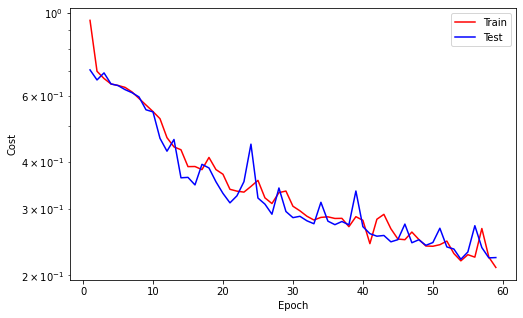

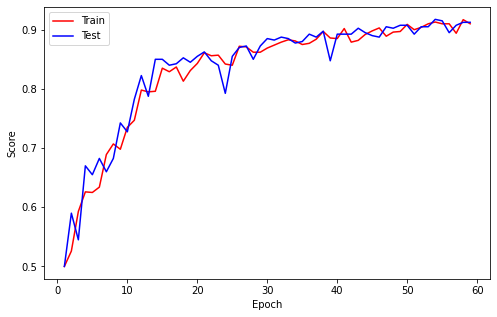

In [12]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    #logging
    callback.log(train_cost, test_cost, train_score, test_score)
    #checkpoint
    callback.save_checkpoint()
    #runtime plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    #early stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

In [13]:
feature, target = next(iter(testloader))
feature, target = feature.to(device),target.to(device)

In [14]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
preds

tensor([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1])

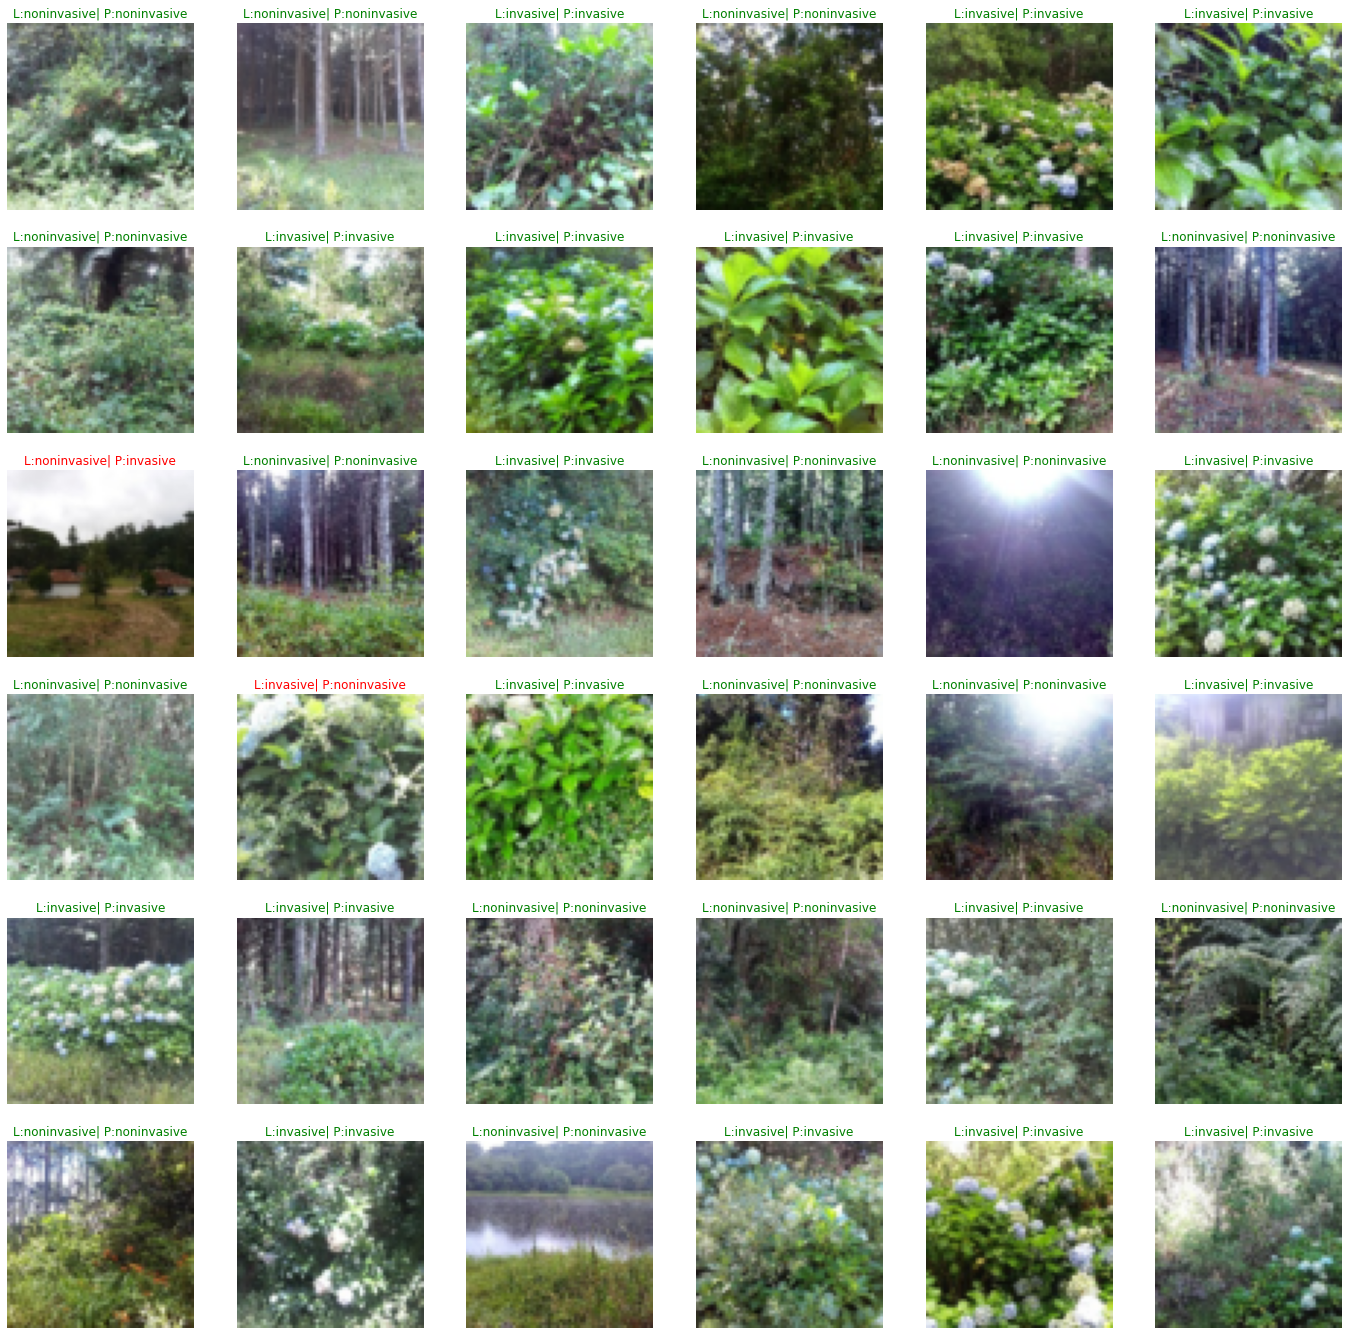

In [15]:
fig, axes = plt.subplots(6,6,figsize=(24,24))
for image, label, pred, ax in zip(feature,target,preds, axes.flatten()):
    ax.imshow(image.permute(1, 2, 0).cpu())
    font = {"color": 'r'} if label != pred else {"color": 'g'}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"L:{label}| P:{pred}", fontdict=font);
    ax.axis('off');